<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/First%20try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First try

Loading train and testset.

In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

print(trainset.head())
print(trainset.shape)
print(testset.head())
print(testset.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
(2000, 15)
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]
(12892, 15)


**Pre-processing: scaling data** Because you need your features all to have the same range of values.

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', '02', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


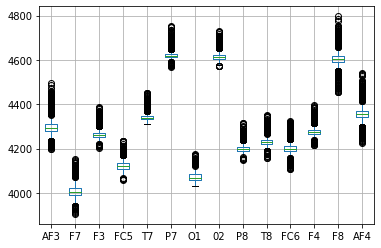

In [83]:
#defining features and labels
labels = trainset.pop('label')
feature_names = list(trainset.columns)
print(feature_names)

#visualizing features' ranges
trainset.boxplot()

You can see above that the features are not scaled yet. Now I will try to scale all features (with MinMaxScaler).

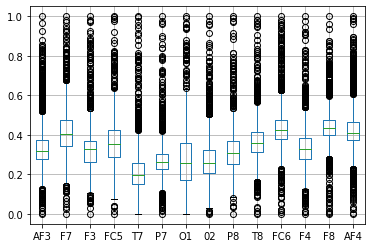

In [84]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()

trainset['AF3'] = feature_scaler.fit_transform(trainset[['AF3']])
trainset['F7'] = feature_scaler.fit_transform(trainset[['F7']])
trainset['F3'] = feature_scaler.fit_transform(trainset[['F3']])
trainset['FC5'] = feature_scaler.fit_transform(trainset[['FC5']])
trainset['T7'] = feature_scaler.fit_transform(trainset[['T7']])
trainset['P7'] = feature_scaler.fit_transform(trainset[['P7']])
trainset['O1'] = feature_scaler.fit_transform(trainset[['O1']])
trainset['02'] = feature_scaler.fit_transform(trainset[['02']])
trainset['P8'] = feature_scaler.fit_transform(trainset[['P8']])
trainset['T8'] = feature_scaler.fit_transform(trainset[['T8']])
trainset['FC6'] = feature_scaler.fit_transform(trainset[['FC6']])
trainset['F4'] = feature_scaler.fit_transform(trainset[['F4']])
trainset['F8'] = feature_scaler.fit_transform(trainset[['F8']])
trainset['AF4'] = feature_scaler.fit_transform(trainset[['AF4']])

#visualizing scaled features
trainset.boxplot()

Now I will look at features that could already give a good separation via distplots.

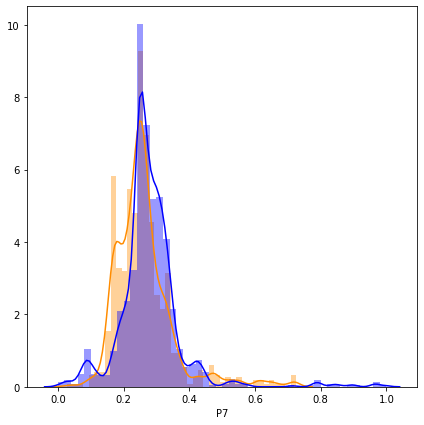

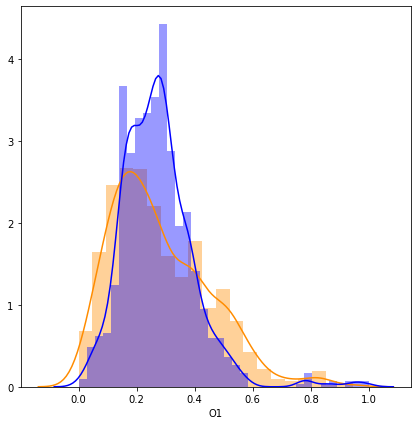

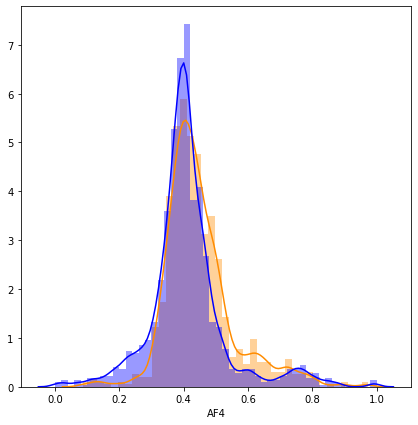

In [100]:
trainset['label'] = labels
plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['P7'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['P7'], color="#0000FF")

plt.show()

plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['O1'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['O1'], color="#0000FF")

plt.show()

plt.figure(figsize=(7,7))

sns.distplot(trainset[trainset.label==1]['AF4'], color="#FF8C00")
sns.distplot(trainset[trainset.label==0]['AF4'], color="#0000FF")

plt.show()

The features 'P7', 'O1' and 'AF4' are looking to have the least overlap in the distplots, but we can't see that the two classes can be distinguished. On the contrary, this will not be easy I think...

Goeiemorgen!! HUP HUP beginnen, ik denk een model definieren en fitten en daarna mss CV en dan gridsearch voor die optimale hyperparameters. En ook modelparameters optimaliseren. 